In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/content/synthetic_fraud_dataset.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [27]:
df.sample(10)

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
8687,8401,314,56.683169,Online,Electronics,FR,18,0.012866,0.236943,0
5930,4941,84,110.045547,ATM,Travel,US,12,0.213429,0.232360,0
7307,8809,12,33.359068,ATM,Food,TR,8,0.191564,0.046278,0
7274,9834,525,1772.787664,ATM,Travel,US,13,0.894861,0.759626,1
4091,7761,498,123.795042,Online,Food,TR,15,0.282964,0.154066,0
7483,7751,743,113.886283,POS,Clothing,TR,14,0.084442,0.253568,0
1254,3498,943,51.413319,ATM,Clothing,UK,18,0.064296,0.214876,0
9870,7241,260,91.768545,Online,Clothing,UK,16,0.192485,0.230235,0
8528,2590,708,94.473355,Online,Grocery,FR,8,0.037585,0.084541,0
2203,1052,802,184.666282,POS,Electronics,TR,10,0.036227,0.236010,0


In [28]:
df['is_fraud'].value_counts(normalize=False), df['is_fraud'].value_counts(normalize=True)

(is_fraud
 0    9500
 1     500
 Name: count, dtype: int64,
 is_fraud
 0    0.95
 1    0.05
 Name: proportion, dtype: float64)

In [29]:
for c in ['user_id','transaction_type','merchant_category','country','hour']:
    print(c, df[c].nunique(), df[c].value_counts().head(10))

user_id 1000 user_id
438    21
824    21
605    21
72     21
848    20
282    20
725    20
236    19
270    19
782    19
Name: count, dtype: int64
transaction_type 4 transaction_type
POS       2568
ATM       2529
QR        2506
Online    2397
Name: count, dtype: int64
merchant_category 5 merchant_category
Food           2023
Travel         2015
Electronics    2007
Clothing       1982
Grocery        1973
Name: count, dtype: int64
country 6 country
US    2050
FR    2027
UK    1965
DE    1930
TR    1928
NG     100
Name: count, dtype: int64
hour 24 hour
13    584
17    564
6     560
21    560
10    560
16    555
15    553
20    548
7     545
9     541
Name: count, dtype: int64


In [30]:
df.describe()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213881,23.000000,0.998737,0.999603,1.000000


In [31]:
df.select_dtypes(include=np.number).corr()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
transaction_id,1.000000,-0.001360,0.242245,-0.070046,0.332211,0.332628,0.377492
user_id,-0.001360,1.000000,-0.008333,-0.022854,0.007316,0.004433,0.006165
amount,0.242245,-0.008333,1.000000,-0.100818,0.554977,0.549554,0.638435
hour,-0.070046,-0.022854,-0.100818,1.000000,-0.149832,-0.161670,-0.181448
device_risk_score,0.332211,0.007316,0.554977,-0.149832,1.000000,0.757978,0.871989
ip_risk_score,0.332628,0.004433,0.549554,-0.161670,0.757978,1.000000,0.870738
is_fraud,0.377492,0.006165,0.638435,-0.181448,0.871989,0.870738,1.000000


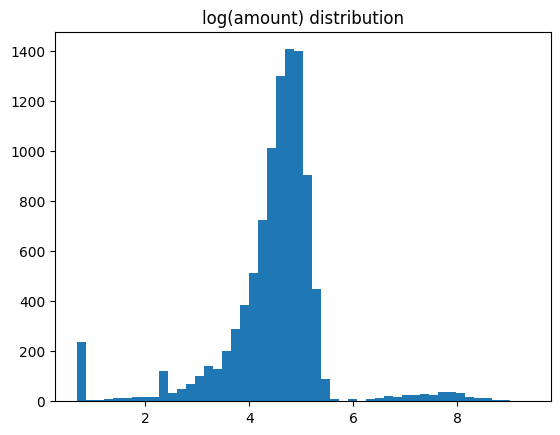

In [32]:
plt.hist(np.log1p(df['amount']), bins=50)
plt.title('log(amount) distribution')
plt.show()

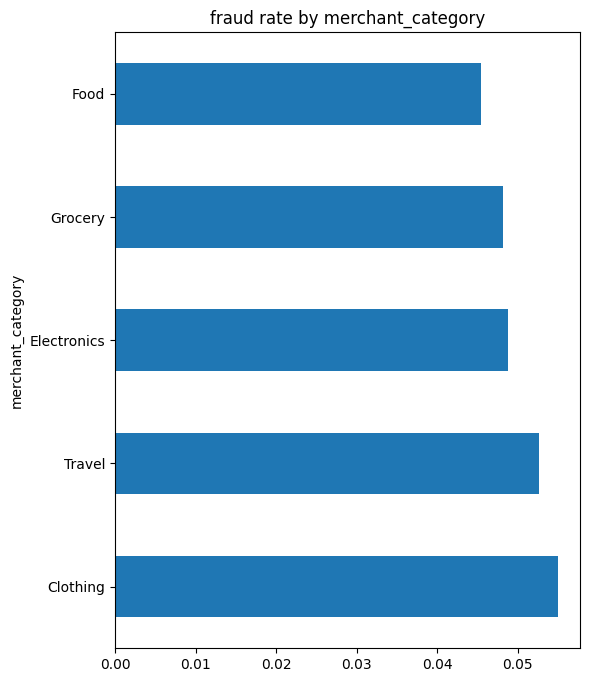

In [33]:
fraud_by_cat = df.groupby('merchant_category')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_cat.plot.barh(figsize=(6,8))
plt.title('fraud rate by merchant_category')
plt.show()

<Axes: xlabel='hour'>

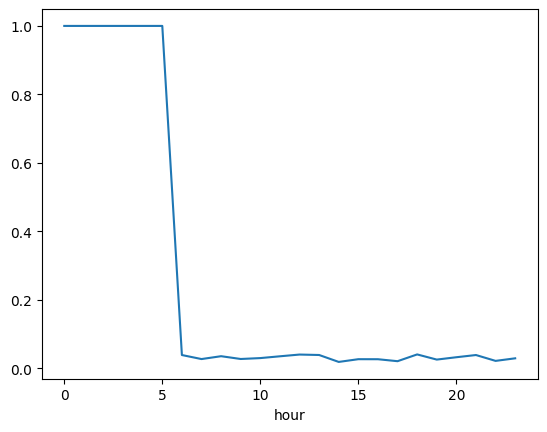

In [34]:
df['is_night'] = df['hour'].isin([0,1,2,3,4,5,6]).astype(int)
df.groupby('hour')['is_fraud'].mean().plot()

In [36]:
df.groupby('hour')['is_fraud'].agg(['mean','count','sum'])

,mean,count,sum
hour,,,
0,1.000000,16,16
1,1.000000,11,11
2,1.000000,16,16
3,1.000000,18,18
4,1.000000,117,117
5,1.000000,15,15
6,0.039286,560,22
7,0.027523,545,15
8,0.035849,530,19


#WE CAN CONCLUDE THAT TRANSITION BETWEEN 0-5 ARE 100% FRAUDT

In [44]:
day_df = df[df['hour'] >= 6]

day_df.groupby('is_fraud')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,9500.0,100.277751,49.500552,1.0,65.180462,100.288774,134.535213,277.203251
1,307.0,1804.512419,1975.005045,10.0,22.168429,1396.549026,2603.243149,11628.213881


In [46]:
pcts = day_df.groupby('is_fraud')['amount'].quantile([0.5,0.75,0.9,0.95,0.99])
pcts

is_fraud      
0         0.50     100.288774
          0.75     134.535213
          0.90     164.096994
          0.95     184.262958
          0.99     214.557975
1         0.50    1396.549026
          0.75    2603.243149
          0.90    4380.134117
          0.95    5384.308545
          0.99    9602.467221
Name: amount, dtype: float64

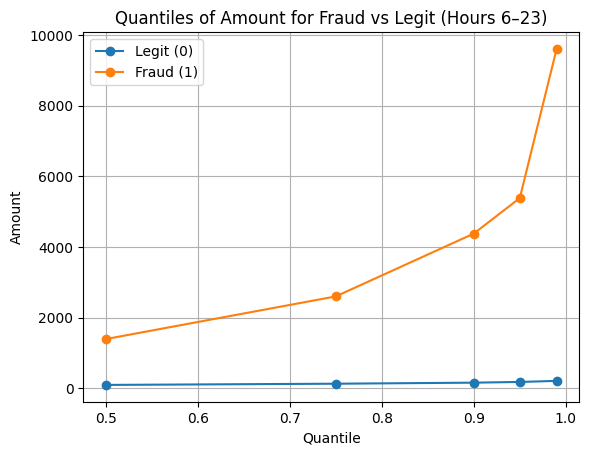

In [47]:
plot_df = pcts.unstack(level=0)   # columns become 0 (legit), 1 (fraud)

plot_df.plot(marker='o')
plt.title("Quantiles of Amount for Fraud vs Legit (Hours 6–23)")
plt.xlabel("Quantile")
plt.ylabel("Amount")
plt.legend(["Legit (0)", "Fraud (1)"])
plt.grid(True)
plt.show()

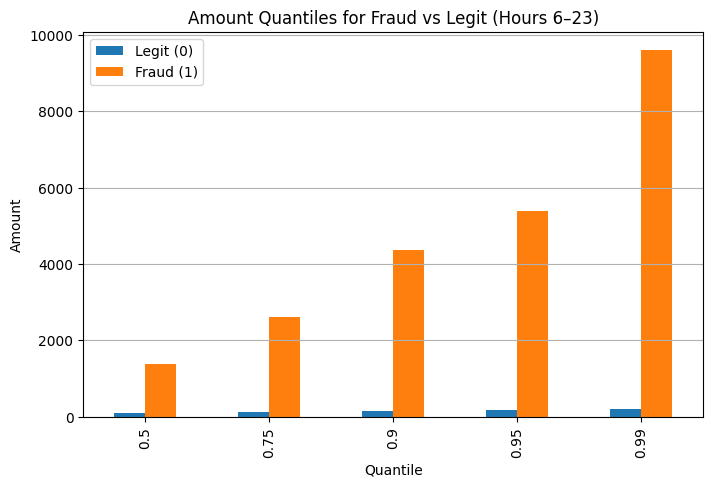

In [48]:
plot_df = pcts.unstack(level=0)

plot_df.plot(kind='bar', figsize=(8,5))
plt.title("Amount Quantiles for Fraud vs Legit (Hours 6–23)")
plt.xlabel("Quantile")
plt.ylabel("Amount")
plt.legend(["Legit (0)", "Fraud (1)"])
plt.grid(axis='y')
plt.show()


#Fraud amounts are 10× to 40× higher than normal.